# Import needed libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Import the dataset

In [4]:
data = pd.read_csv("D:\Microsoft sc/nearest-earth-objects(1910-2024).csv")

In [5]:
data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [7]:
data.nunique()

neo_id                     33514
name                       33514
absolute_magnitude          1778
estimated_diameter_min      1778
estimated_diameter_max      1778
orbiting_body                  1
relative_velocity         338189
miss_distance             337826
is_hazardous                   2
dtype: int64

In [8]:
data.shape

(338199, 9)

In [9]:
data.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


# Data Preprocessing

## Data Cleaning

In [10]:
data["orbiting_body"].value_counts()

Earth    338199
Name: orbiting_body, dtype: int64

#### Feature Selection

In [11]:
# Drop unneeded features
data.drop(['neo_id','name','orbiting_body'], axis=1, inplace=True)

### Drop Dublicates

In [12]:
data.duplicated().sum()

5

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(338194, 6)

### Drop Nulls

In [15]:
data.isnull().sum()

absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [16]:
data.dropna(inplace=True)

In [17]:
data.shape

(338166, 6)

### Handling outliers

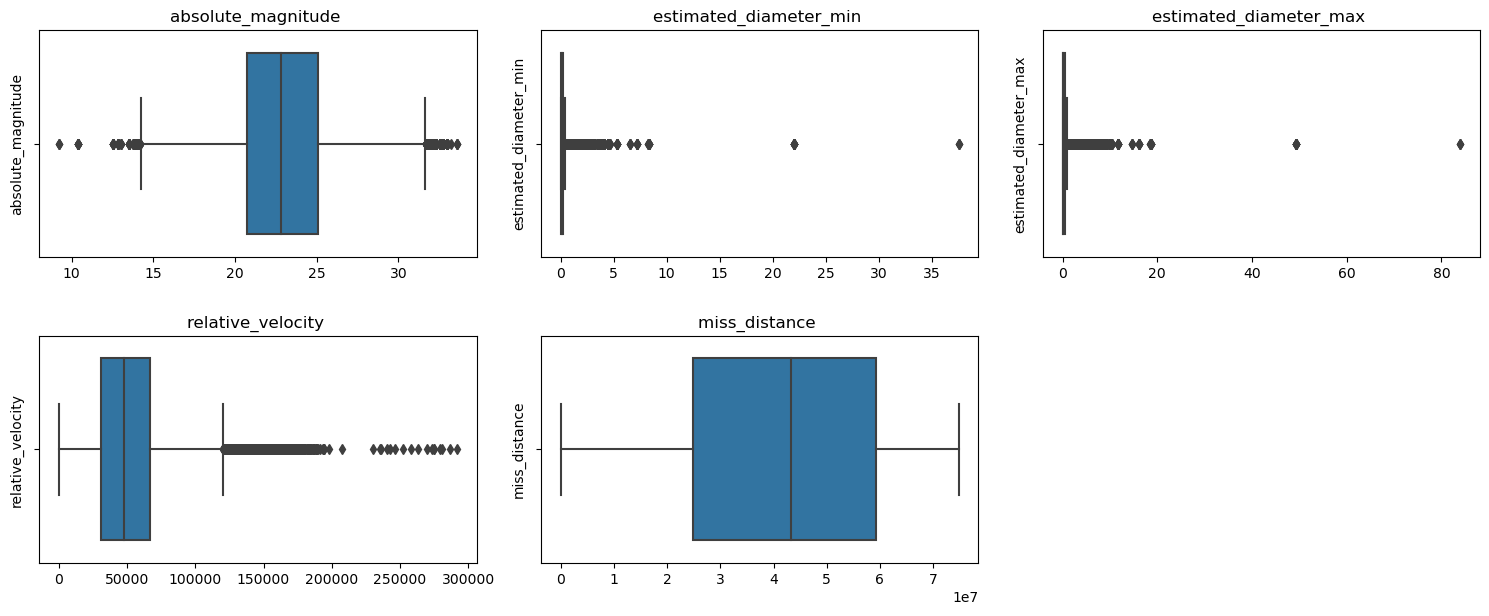

In [18]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=data, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

- Miss distance does not have outliers

### Removing outliers using IQR 

In [19]:
# Remove outliers function
def remove_outliers(feature):
    global data
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.65)
    iqr = q3 - q1

    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    data = data.loc[(data[feature] < upper_limit) & (data[feature] > lower_limit)]

In [20]:
features_list = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max", "relative_velocity"]

for feature in features_list:
    remove_outliers(feature)

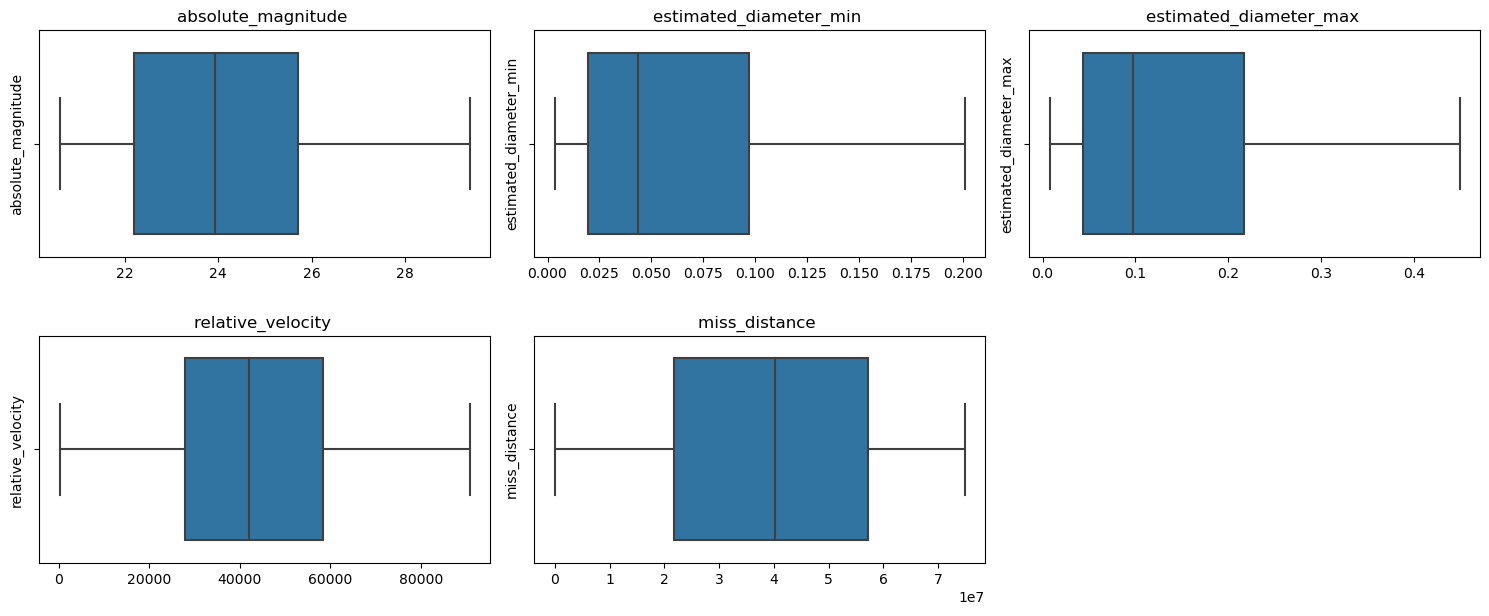

In [21]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=data, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

- Finally, No outliers

In [22]:
data.shape

(244451, 6)

# Exploratory Data Analysis (EDA)

In [23]:
data.dtypes

absolute_magnitude        float64
estimated_diameter_min    float64
estimated_diameter_max    float64
relative_velocity         float64
miss_distance             float64
is_hazardous                 bool
dtype: object

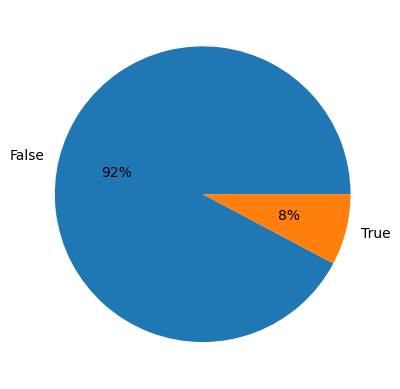

In [24]:
is_hazardous = data["is_hazardous"].value_counts()
plt.pie(
    x=is_hazardous.values,
    labels=np.where(is_hazardous.keys() == False, "False", "True"),
    autopct="%0.0f%%",
)
plt.show()

- Imbalanced classes

### Distributions (Understanding Data Spread)

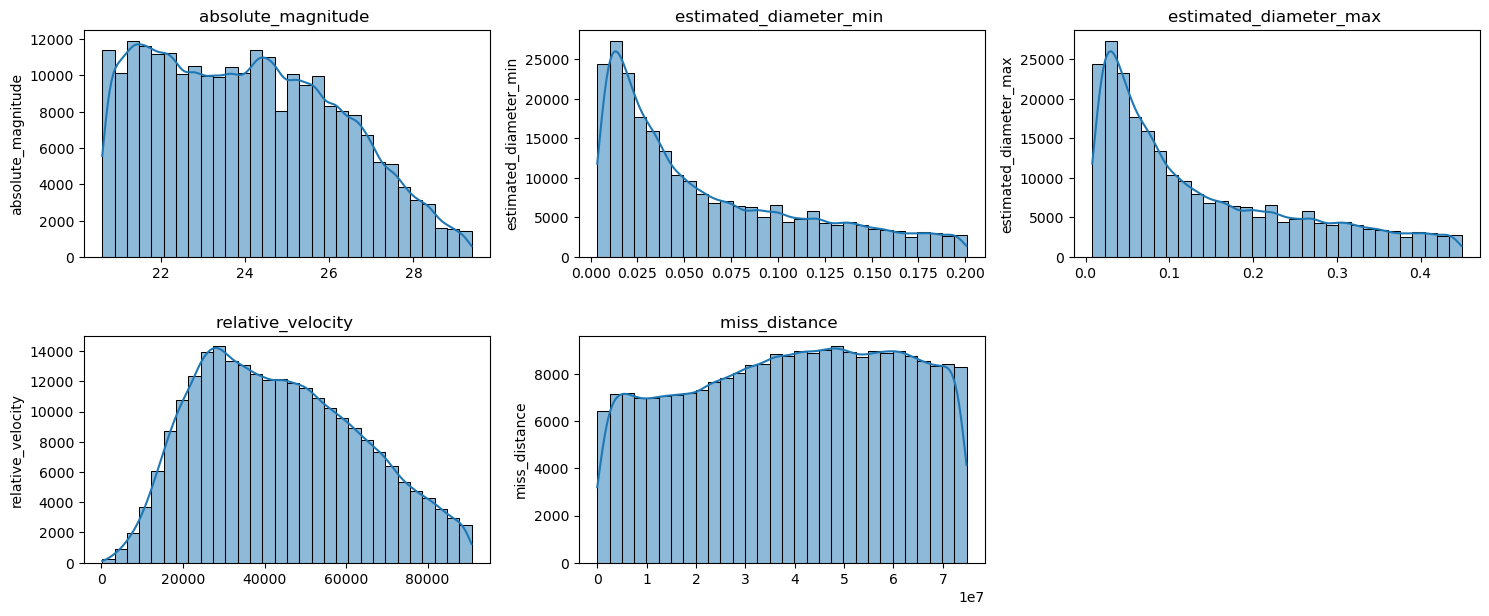

In [25]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=data, x=feature, bins=30, kde=True)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)
plt.tight_layout()

### Split columns into features and target

In [26]:
feature_columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']
target_column = 'is_hazardous'

### Data Range with Box Plots

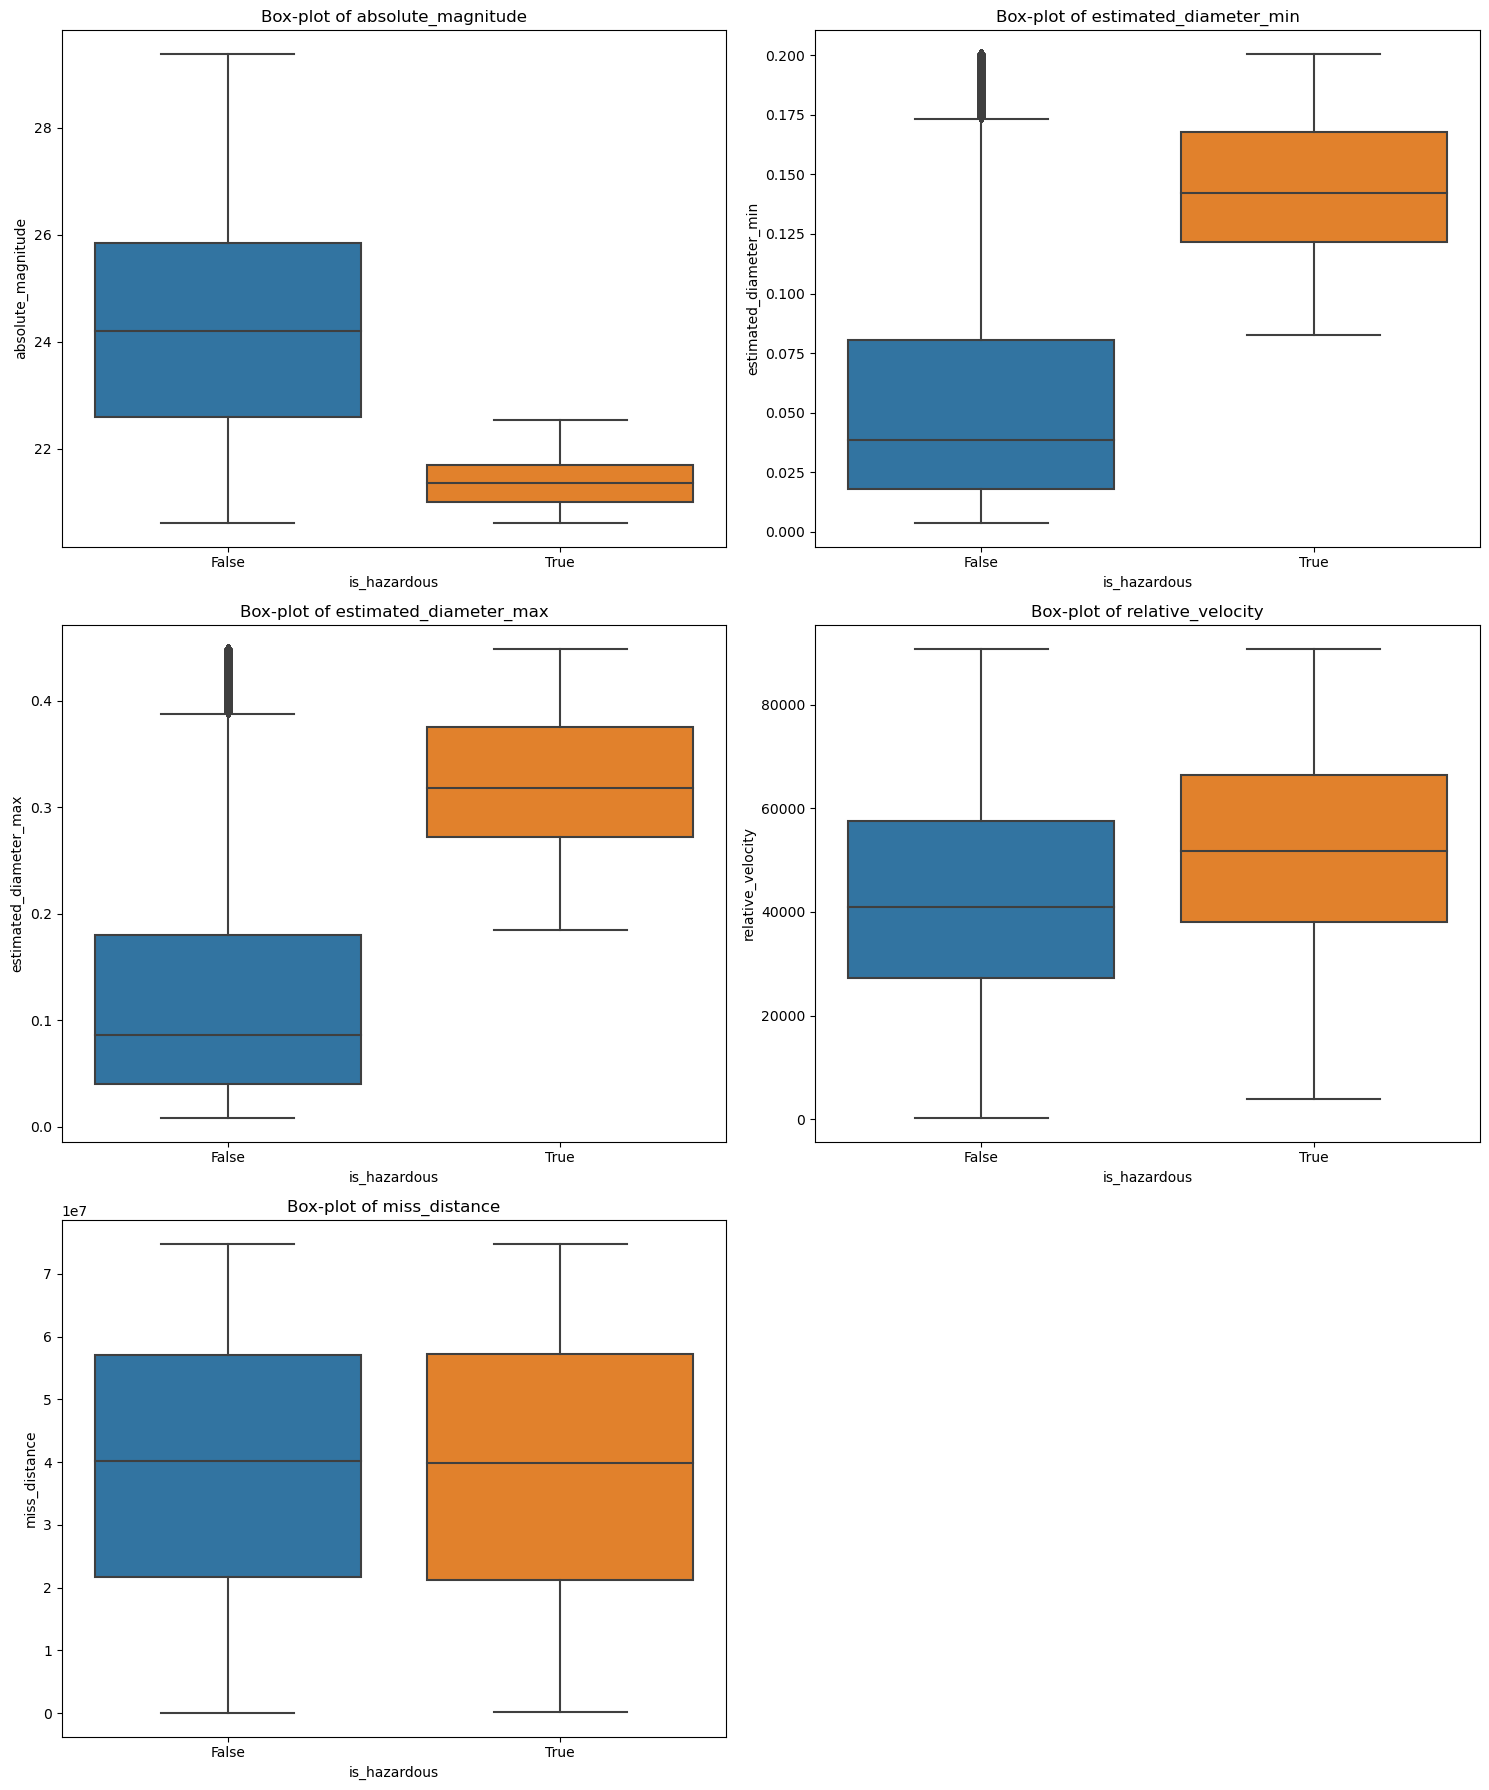

In [27]:
plt.figure(figsize=(15,18))
for i,column in enumerate(feature_columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=target_column,y=column,data=data)
    plt.title('Box-plot of {}'.format(column))
plt.tight_layout()
plt.show()

### Data Density with Violin Plots

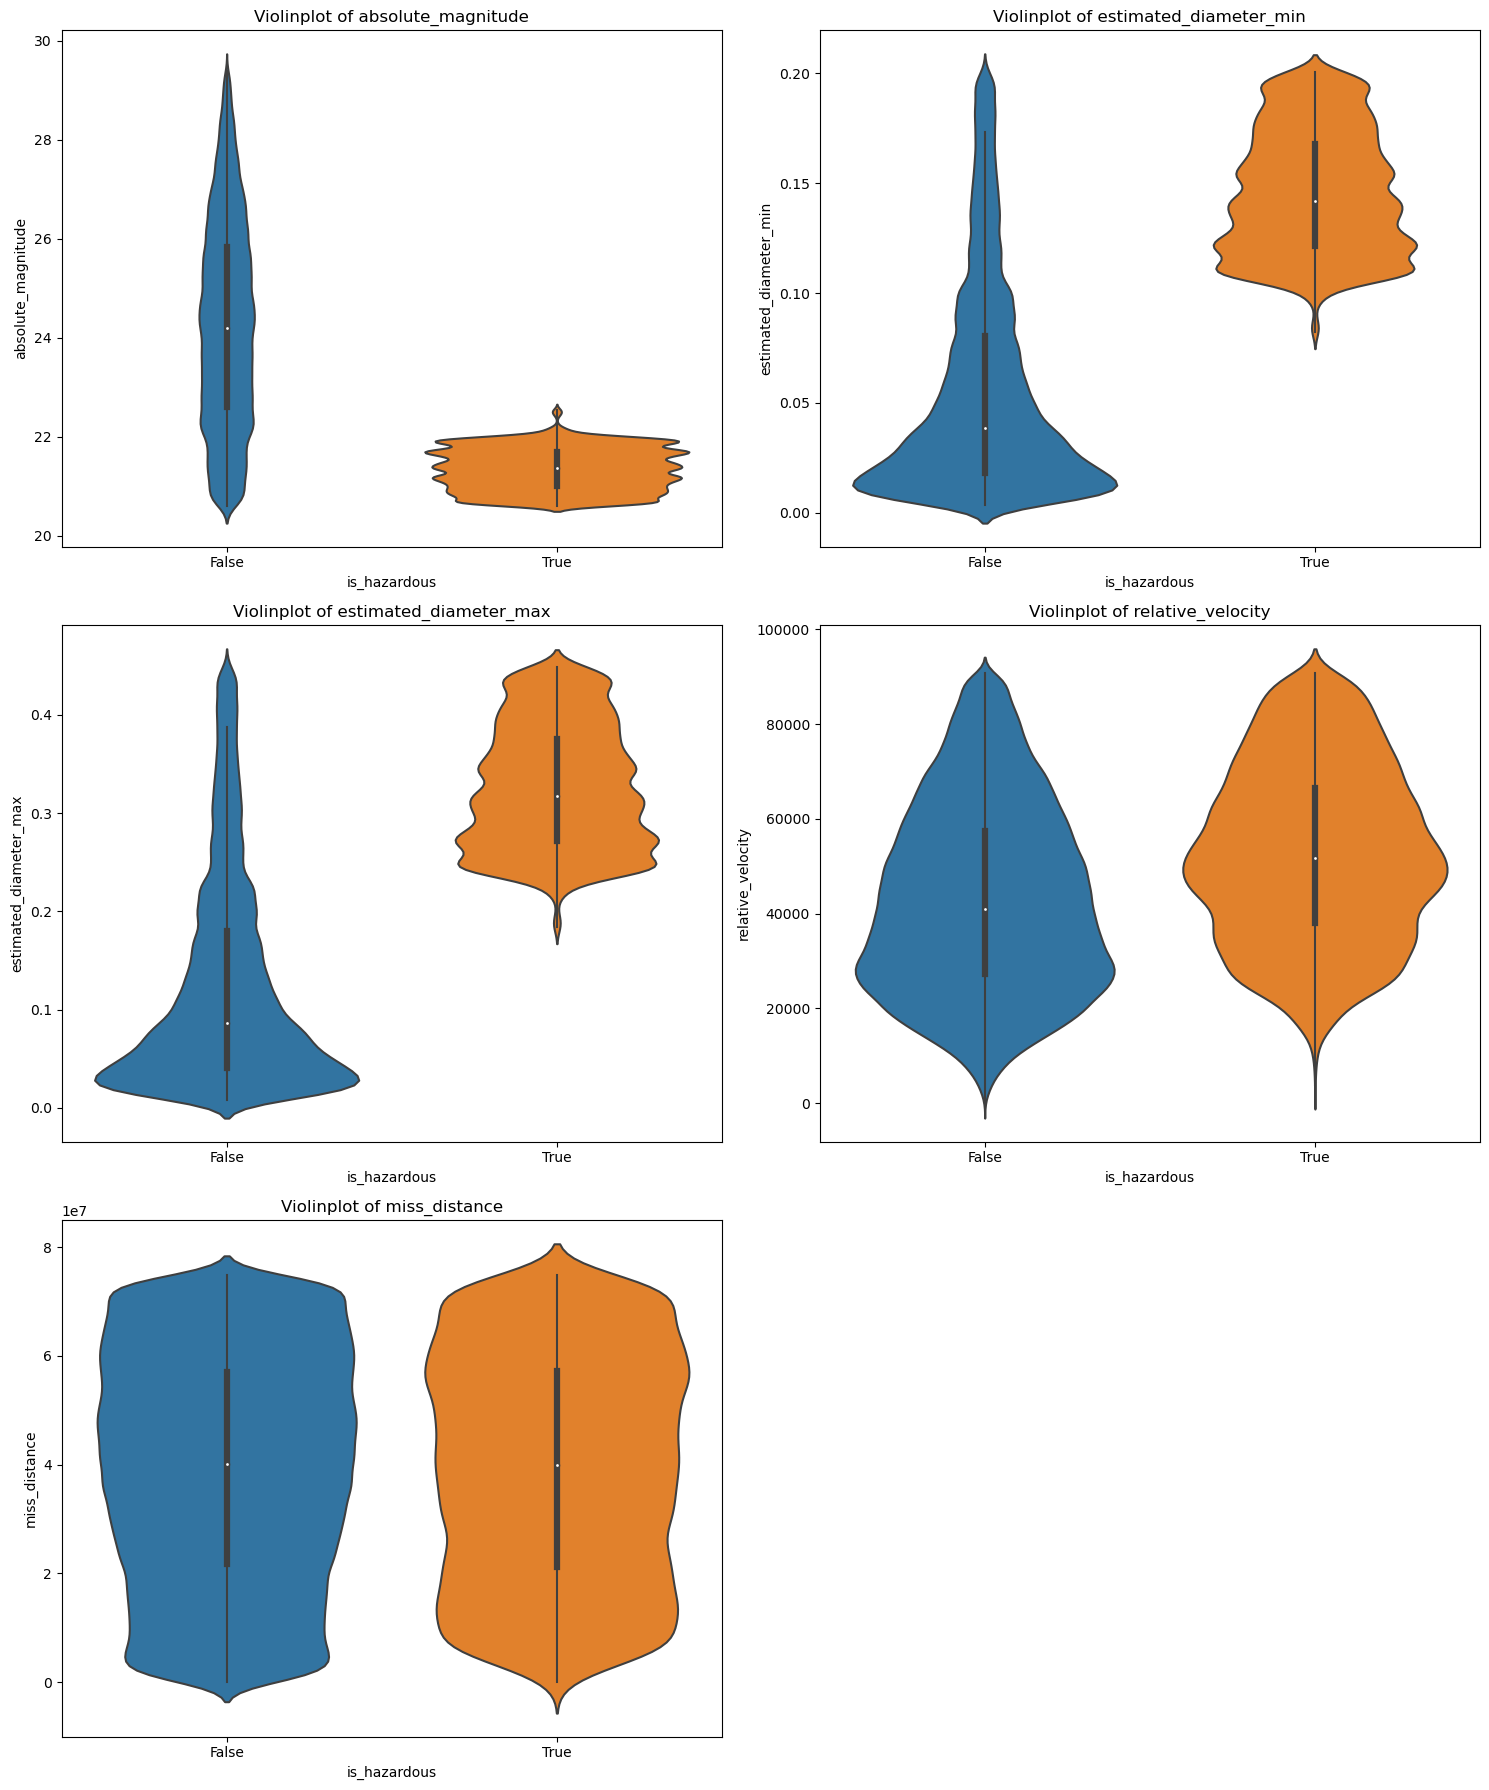

In [28]:
plt.figure(figsize=(15,18))
for i,column in enumerate(feature_columns):
    plt.subplot(3,2,i+1)
    sns.violinplot(x=target_column,y=column,data=data)
    plt.title('Violinplot of {}'.format(column))
plt.tight_layout()
plt.show()

### Correlation

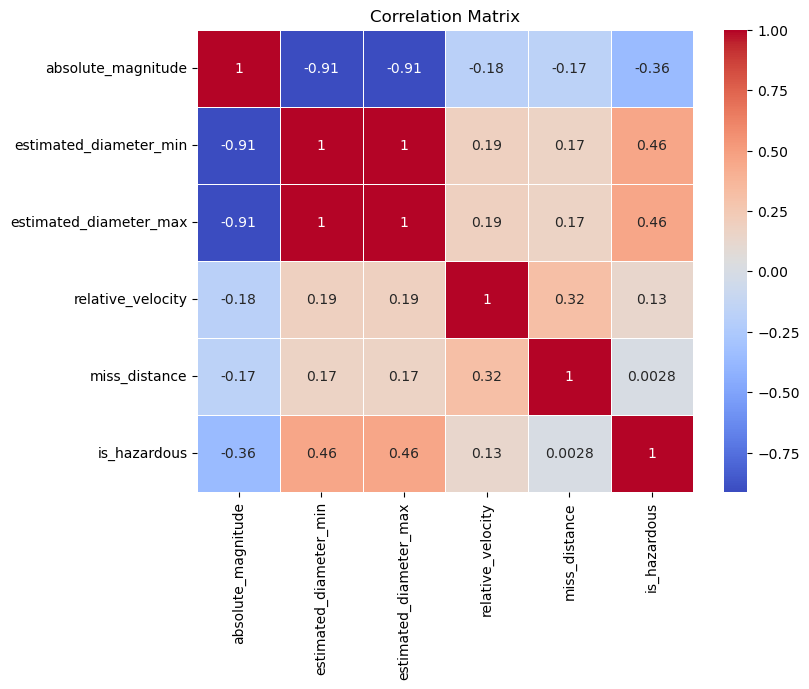

In [29]:
corr_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- estimated_diameter_min and estimated_diameter_max are perfectly correlated and including both could lead to multicollinearity.

- The correlation of -0.91 between absolute_magnitude and both estimated_diameter_min and estimated_diameter_max 
suggests a strong negative linear relationship.

- We can use PCA to overcome this multicollinearity.

# Feature Engineering

### Feature Scaling Using Min Max Scaler

In [30]:
#Data Normalization

In [31]:
scale = MinMaxScaler()
for i in feature_columns:
    data[i] = scale.fit_transform(data[[i]])

### Encoding Categorical Data Using Label Encoder

In [32]:
encode = LabelEncoder()
data['is_hazardous'] = encode.fit_transform(data['is_hazardous'])

In [33]:
data.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
2,0.095781,0.673450,0.673450,0.272355,0.898501,0
3,0.002281,0.990668,0.990668,0.868971,0.406326,0
4,0.238312,0.370859,0.370859,0.616589,0.843839,0
5,0.500570,0.116874,0.116874,0.522070,0.573575,0
6,0.101482,0.657712,0.657712,0.636653,0.364645,1


In [34]:
X = data.drop(columns=['is_hazardous'], axis=1)
y = data['is_hazardous']

In [35]:
X.shape

(244451, 5)

## Handling Imbalanced Classes

### Oversampling Using SMOTE

In [36]:
somte = SMOTE(random_state=42)

X, y = somte.fit_resample(X, y)

y.value_counts()

0    225477
1    225477
Name: is_hazardous, dtype: int64

## Feature Extraction

### PCA

- To solve collinearity

In [45]:
# Reducing Dimensions
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(450954, 3)


## Split Data into Training and Test

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, random_state=42, stratify=y, test_size=0.3)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((315667, 3), (315667,), (135287, 3), (135287,))

# Models Building and Evaluation

## Random Forest Classifier

In [71]:
rfc = RandomForestClassifier(n_estimators = 150, random_state=42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     67644
           1       0.91      0.99      0.95     67643

    accuracy                           0.95    135287
   macro avg       0.95      0.95      0.95    135287
weighted avg       0.95      0.95      0.95    135287



In [73]:
print('Training Score:',rfc.score(x_train,y_train))

Training Score: 1.0


- Overfitting

In [74]:
print("Acc is: {} %".format(accuracy_score(y_pred, y_test) * 100))

Acc is: 94.57375801074753 %


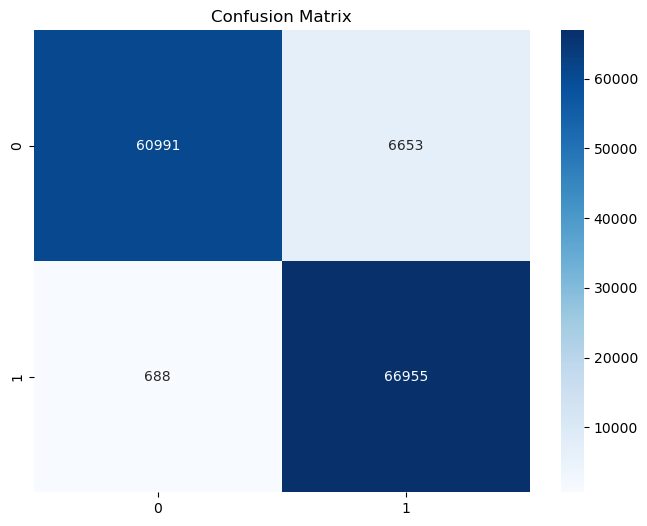

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Learning Curve

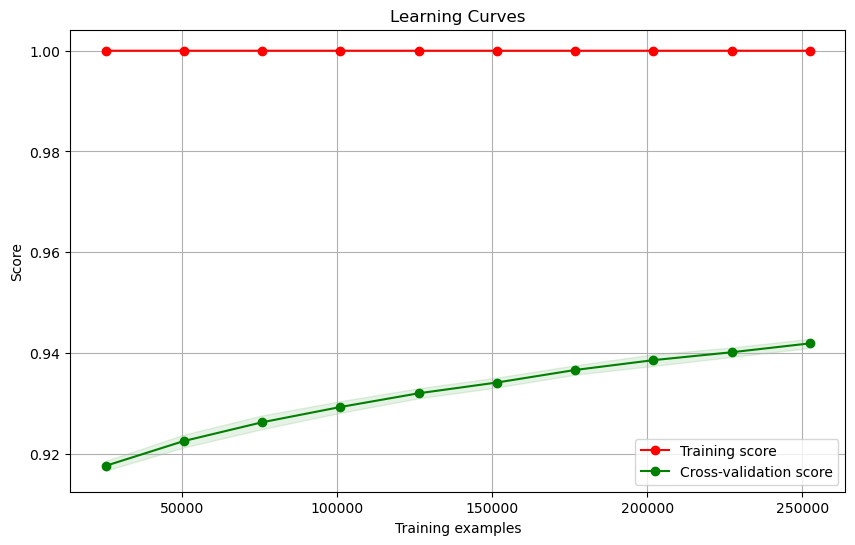

In [76]:
train_sizes, train_scores, test_scores = learning_curve(
    rfc, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

- Overfitting

## XGBoost, Gradient Boosting, and Voting Classifier

In [47]:
xgb_model = XGBClassifier(use_label_encoder=False)
gb_model = GradientBoostingClassifier()
voting_model = VotingClassifier(estimators=[
    ('xgb', xgb_model),
    ('gb', gb_model)
], voting='soft')

# Train models
xgb_model.fit(x_train, y_train)
gb_model.fit(x_train, y_train)
voting_model.fit(x_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(x_test)
gb_predictions = gb_model.predict(x_test)
voting_predictions = voting_model.predict(x_test)

In [48]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print()

print("XGBoost Classifier:")
evaluate_model(y_test, xgb_predictions, "XGBoost Classifier")

print("Gradient Boosting Classifier:")
evaluate_model(y_test, gb_predictions, "Gradient Boosting Classifier")

print("Voting Classifier:")
evaluate_model(y_test, voting_predictions, "Voting Classifier")

XGBoost Classifier:
Evaluation for XGBoost Classifier:
Accuracy: 0.9212
              precision    recall  f1-score   support

           0       0.99      0.85      0.92     67644
           1       0.87      0.99      0.93     67643

    accuracy                           0.92    135287
   macro avg       0.93      0.92      0.92    135287
weighted avg       0.93      0.92      0.92    135287

Precision: 0.9290
Recall: 0.9212
F1-Score: 0.9209

Gradient Boosting Classifier:
Evaluation for Gradient Boosting Classifier:
Accuracy: 0.9137
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     67644
           1       0.86      0.99      0.92     67643

    accuracy                           0.91    135287
   macro avg       0.92      0.91      0.91    135287
weighted avg       0.92      0.91      0.91    135287

Precision: 0.9224
Recall: 0.9137
F1-Score: 0.9132

Voting Classifier:
Evaluation for Voting Classifier:
Accuracy: 0.9171
          

In [62]:
print('Training Score:',voting_model.score(x_train,y_train))

Training Score: 0.917666401619428


### AUC-ROC Curve

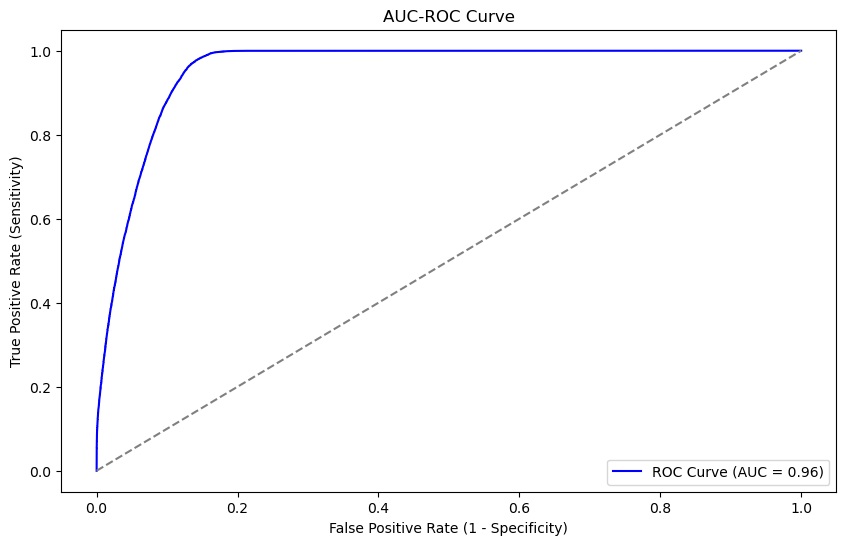

In [95]:
y_proba = voting_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (class 1)
# Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# Calculate AUC (Area Under Curve)
auc = roc_auc_score(y_test, y_proba)
# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
# Plot the baseline (random classifier) as a dashed line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.show()

## KNN

In [96]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [97]:
print('Training Score:',knn.score(x_train,y_train))

Training Score: 0.9584657249569958


In [98]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

KNN Accuracy: 0.9463215238714733


In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     67644
           1       0.91      0.99      0.95     67643

    accuracy                           0.95    135287
   macro avg       0.95      0.95      0.95    135287
weighted avg       0.95      0.95      0.95    135287



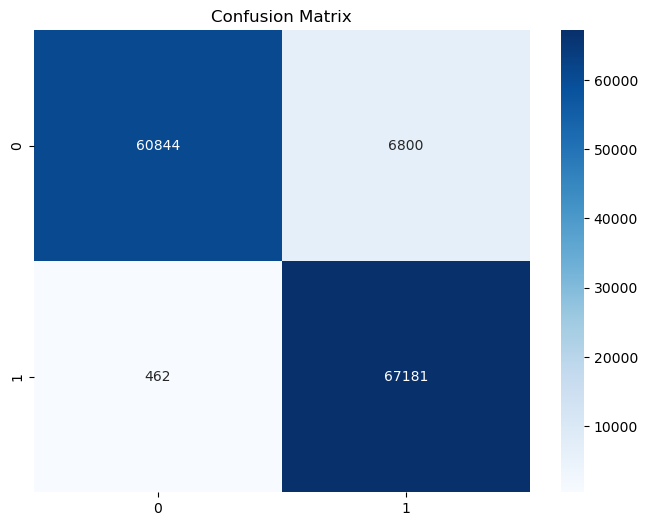

In [100]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### AUC-ROC Curve

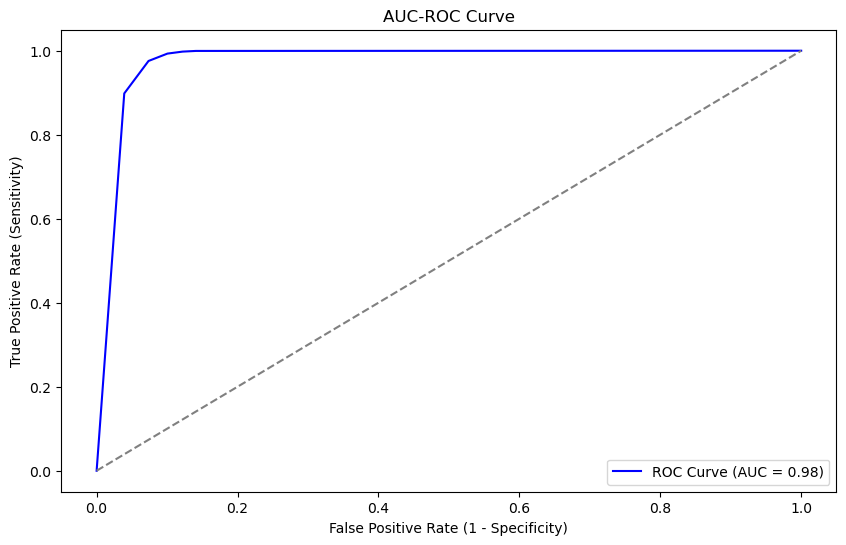

In [94]:
y_proba = knn.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (class 1)
# Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
# Calculate AUC (Area Under Curve)
auc = roc_auc_score(y_test, y_proba)
# Plot the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
# Plot the baseline (random classifier) as a dashed line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('AUC-ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right')
plt.show()

 - Best Model

## Logistic Regression

In [103]:
LR = LogisticRegression(random_state=0)
LR.fit(X=x_train, y=y_train)
y_pred = LR.predict(x_test)

In [104]:
print('Training Score:', LR.score(x_train, y_train))

Training Score: 0.8954467841111045


In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89     67644
           1       0.86      0.95      0.90     67643

    accuracy                           0.90    135287
   macro avg       0.90      0.90      0.89    135287
weighted avg       0.90      0.90      0.89    135287



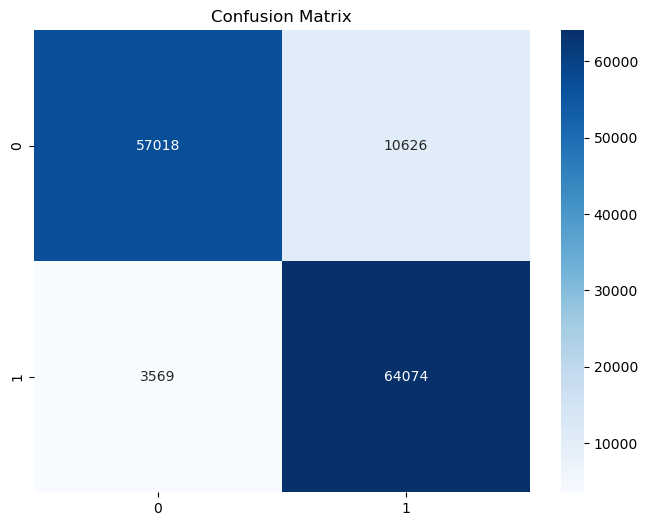

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

------------------

## Hyperparameters Tuning Using Randomized Search CV

### KNN

In [54]:
knn=KNeighborsClassifier()
parameters = {'n_neighbors':[40, 45, 50],
              'weights':['uniform', 'distance'],
              'metric' : ['minkowski','euclidean','manhattan']}
knn_clf=RandomizedSearchCV(knn, parameters, scoring='f1', n_iter=100)
knn_clf.fit(x_train,y_train)
knn_best = knn_clf.best_params_
print(knn_clf.best_params_)

{'weights': 'distance', 'n_neighbors': 40, 'metric': 'manhattan'}


In [55]:
y_pred = knn_clf.predict(x_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     67644
           1       0.88      1.00      0.93     67643

    accuracy                           0.93    135287
   macro avg       0.94      0.93      0.93    135287
weighted avg       0.94      0.93      0.93    135287



In [63]:
print('Training Score:',knn_clf.score(x_train,y_train))

Training Score: 1.0


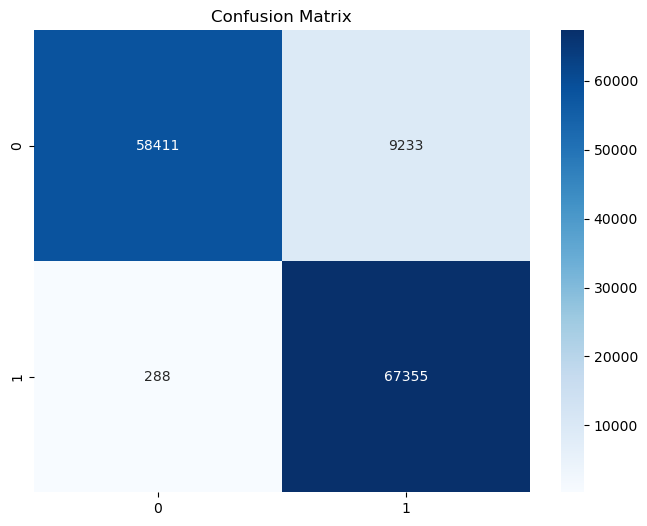

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

In [59]:
LR = LogisticRegression(random_state=0)
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}
lr_clf = RandomizedSearchCV(LR, parameters, scoring='f1', n_iter=250) #Randomized Search
lr_clf.fit(X=x_train, y=y_train)
lr_best = lr_clf.best_params_
print(lr_clf.best_params_)


{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 300, 'C': 0.001}


In [60]:
print('Training Score:', lr_clf.best_estimator_.score(x_train, y_train))

Training Score: 0.9060180506673171


In [64]:
y_pred = lr_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     67644
           1       0.86      0.97      0.91     67643

    accuracy                           0.91    135287
   macro avg       0.91      0.91      0.91    135287
weighted avg       0.91      0.91      0.91    135287



--------------------------------------------------

## SVM

In [65]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [66]:
y_pred_svm = svm_model.predict(x_test)

In [67]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.9008995690642856


In [69]:
print('Training Score:', svm_model.score(x_train, y_train))

Training Score: 0.9002493133586976


In [70]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     67644
           1       0.84      0.99      0.91     67643

    accuracy                           0.90    135287
   macro avg       0.91      0.90      0.90    135287
weighted avg       0.91      0.90      0.90    135287



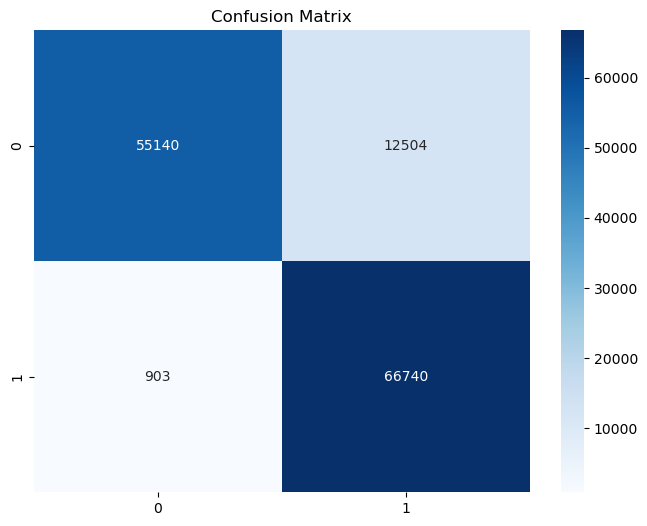

In [107]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Best Model

#### - So, the best model is KNN with accuracy 95%